# Test problem for Ag Package

#### Based on Sagehen example problem, model is run outside of notebook

In [1]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
import arcpy
import geopandas
import matplotlib.image as mpimg
import ConfigParser
import numpy as np
import pandas as pd
import datetime
from Figures import ReportFigures
from matplotlib import cm
from arcpy import env
from datetime import date
from datetime import timedelta
from dateutil.parser import parse

In [2]:
rf = ReportFigures()
rf.set_style()
sys.path.append('..')
python_exe = sys.executable

### Read and process the Ag diversion segment gage file

In [3]:
# calculate number of lines in file
num_lines = 0
with open(r"C:\Users\rniswon\Documents\Data\Git\gsflow\gsflow_examples.git\sagehen_Agwater_trigger\output_GSFLOW_only\modflow\sagehensfr24_HighKc.out", 'r') as f:
    for line in f:
        num_lines += 1

# set dates for daily values
dates = []
for i in range(num_lines-1): 
    dates.append(datetime.date(1990, 10, 1)+datetime.timedelta(days=i))
    
# set start and end dates for plot 
startdate, enddate, plotdates = [], [], []
startdate.append(datetime.date(1990, 3, 1))
enddate.append(datetime.date(1993, 3, 1))

#open file again to read lines
fname = open(r"C:\Users\rniswon\Documents\Data\Git\gsflow\gsflow_examples.git\sagehen_Agwater_trigger\output_GSFLOW_only\modflow\sagehensfr24_HighKc.out","r")
#set firstline for headers
firstline=fname.readline()
# store all data from file in lines
lines=fname.readlines()
x, y1, y2, y3 = [], [], [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lines:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        plotdates.append(dates[i])
        x.append(line.split()[0])
        y1.append(line.split()[4])
        y2.append(line.split()[5])
#        y3.append(line.split()[6])  SUP pumping
# close file
fname.close()

header=[]

# set headers for plot legend
header.append(firstline.split()[0])
header.append(firstline.split()[1])
header.append(firstline.split()[2])
header.append(firstline.split()[3])
header.append(firstline.split()[4])
header.append(firstline.split()[5])
header.append(firstline.split()[6])


#### Plot water right and diversion amount in USGS report format

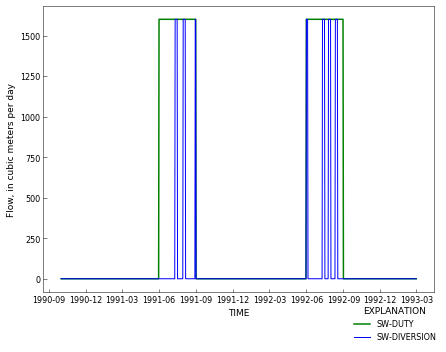

In [6]:
fig, ax = plt.subplots()
# water right
ax.plot(plotdates,y1,color='g', linewidth=1.5, label=header[4])
# actual diversion
ax.plot(plotdates,y2,color='b', linewidth=1.0, label=header[5])
#ax.plot(plotdates,y3,color='r', linewidth=1.0, label=header[6]) SUP pumping
ax.set_ylabel('Flow, in cubic meters per day')
ax.set_xlabel(header[0])
handles, labels = ax.get_legend_handles_labels()
rf.legend(ax, handles, labels, bbox_to_anchor=(.9, -0.2))